<a href="https://colab.research.google.com/github/priyadharshinibd-collab/Projects-/blob/main/task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile
import os
import pandas as pd

zip_file_path = '/content/archive (5).zip'
extracted_path = '/content/extracted_data'

# Create directory for extraction
os.makedirs(extracted_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List extracted files to find the data file (assuming it's a CSV)
extracted_files = os.listdir(extracted_path)
print("Extracted files:", extracted_files)

# Assuming the main data file is a CSV and the first one in the list
# You might need to adjust this based on the actual file name
if extracted_files:
    data_file_path = os.path.join(extracted_path, extracted_files[0])
    # Check if the file is a CSV before attempting to read
    if data_file_path.lower().endswith('.csv'):
        df = pd.read_csv(data_file_path)
        display(df.head())
    else:
        print(f"The extracted file '{extracted_files[0]}' is not a CSV. Please specify the correct data file.")
else:
    print("No files were extracted.")

Extracted files: ['breast-cancer.csv']


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Task
Load the dataset from "/content/archive (5).zip", prepare it for binary classification by identifying the target variable, handling missing values, encoding categorical features, and splitting the data into training and testing sets.

## Identify target variable

### Subtask:
Determine which column represents the target variable for binary classification.


**Reasoning**:
Inspect the column names and the unique values of the potential target column to identify the target variable and confirm its suitability for binary classification.



In [2]:
print(df.columns)
print(df['diagnosis'].dtype)
print(df['diagnosis'].unique())

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
object
['M' 'B']


## Handle missing values

### Subtask:
Check for and handle any missing values in the dataset.


**Reasoning**:
Calculate the number of missing values per column to identify if any cleaning is needed.



In [3]:
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## Encode categorical features

### Subtask:
Convert any categorical features into a numerical format suitable for machine learning models.


**Reasoning**:
Identify and one-hot encode the categorical column 'diagnosis'.



In [4]:
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,True
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,True
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,True
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,True


## Split data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['id', 'diagnosis_M'], axis=1)
y = df['diagnosis_M']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


## Summary:

### Data Analysis Key Findings

*   The target variable for binary classification was identified as the 'diagnosis' column, containing 'M' and 'B' values.
*   The dataset has no missing values.
*   The categorical 'diagnosis' column was successfully one-hot encoded into a numerical 'diagnosis\_M' column.
*   The dataset was split into training and testing sets, with 426 samples in the training set and 143 samples in the testing set.

### Insights or Next Steps

*   The prepared dataset is ready for training a binary classification model.
*   The next step is to select an appropriate classification model and train it using the `X_train` and `y_train` data, followed by evaluating its performance on the `X_test` and `y_test` data.


# Task
Train and evaluate SVM models with linear and RBF kernels on the dataset located at "/content/archive (5).zip". Compare the performance of the two models.

## Train svm with linear kernel

### Subtask:
Train an SVM model with a linear kernel on the training data.


**Reasoning**:
Train an SVM model with a linear kernel using the training data.



In [6]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

## Evaluate linear svm

### Subtask:
Evaluate the performance of the linear SVM model on the testing data.


**Reasoning**:
Evaluate the performance of the linear SVM model using accuracy, precision, recall, and F1-score.



In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_linear = svm_linear.predict(X_test)

accuracy_linear = accuracy_score(y_test, y_pred_linear)
precision_linear = precision_score(y_test, y_pred_linear)
recall_linear = recall_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print(f"Linear SVM Performance:")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall: {recall_linear:.4f}")
print(f"F1-score: {f1_linear:.4f}")

Linear SVM Performance:
Accuracy: 0.9580
Precision: 0.9615
Recall: 0.9259
F1-score: 0.9434


## Train svm with rbf kernel

### Subtask:
Train an SVM model with an RBF kernel on the training data.


**Reasoning**:
Train an SVM model with an RBF kernel on the training data.



In [8]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(random_state=42)

## Evaluate rbf svm

### Subtask:
Evaluate the performance of the RBF SVM model on the testing data.


**Reasoning**:
Calculate and print the accuracy, precision, recall, and F1-score of the RBF SVM model on the test set.



In [9]:
y_pred_rbf = svm_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print(f"RBF SVM Performance:")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"Precision: {precision_rbf:.4f}")
print(f"Recall: {recall_rbf:.4f}")
print(f"F1-score: {f1_rbf:.4f}")

RBF SVM Performance:
Accuracy: 0.9510
Precision: 0.9796
Recall: 0.8889
F1-score: 0.9320


## Compare models

### Subtask:
Compare the performance of the linear and RBF SVM models.


**Reasoning**:
Print the evaluation metrics for both models and then write a summary comparing their performance based on the metrics.



In [10]:
print("Linear SVM Performance:")
print(f"Accuracy: {accuracy_linear:.4f}")
print(f"Precision: {precision_linear:.4f}")
print(f"Recall: {recall_linear:.4f}")
print(f"F1-score: {f1_linear:.4f}\n")

print("RBF SVM Performance:")
print(f"Accuracy: {accuracy_rbf:.4f}")
print(f"Precision: {precision_rbf:.4f}")
print(f"Recall: {recall_rbf:.4f}")
print(f"F1-score: {f1_rbf:.4f}\n")

print("Performance Comparison:")
print(f"Accuracy: Linear ({accuracy_linear:.4f}) vs RBF ({accuracy_rbf:.4f}) - Linear is slightly better.")
print(f"Precision: Linear ({precision_linear:.4f}) vs RBF ({precision_rbf:.4f}) - RBF is better.")
print(f"Recall: Linear ({recall_linear:.4f}) vs RBF ({recall_rbf:.4f}) - Linear is better.")
print(f"F1-score: Linear ({f1_linear:.4f}) vs RBF ({f1_rbf:.4f}) - Linear is slightly better.")

print("\nOverall Summary:")
print("The linear SVM model shows slightly better overall performance in terms of accuracy, recall, and F1-score.")
print("The RBF SVM model demonstrates higher precision, meaning it has fewer false positives.")
print("Depending on the specific needs (minimizing false positives vs. minimizing false negatives), one model might be preferred over the other.")

Linear SVM Performance:
Accuracy: 0.9580
Precision: 0.9615
Recall: 0.9259
F1-score: 0.9434

RBF SVM Performance:
Accuracy: 0.9510
Precision: 0.9796
Recall: 0.8889
F1-score: 0.9320

Performance Comparison:
Accuracy: Linear (0.9580) vs RBF (0.9510) - Linear is slightly better.
Precision: Linear (0.9615) vs RBF (0.9796) - RBF is better.
Recall: Linear (0.9259) vs RBF (0.8889) - Linear is better.
F1-score: Linear (0.9434) vs RBF (0.9320) - Linear is slightly better.

Overall Summary:
The linear SVM model shows slightly better overall performance in terms of accuracy, recall, and F1-score.
The RBF SVM model demonstrates higher precision, meaning it has fewer false positives.
Depending on the specific needs (minimizing false positives vs. minimizing false negatives), one model might be preferred over the other.


## Summary:

### Data Analysis Key Findings

*   The linear SVM model achieved an accuracy of 0.9580, precision of 0.9615, recall of 0.9259, and F1-score of 0.9434 on the testing data.
*   The RBF SVM model achieved an accuracy of 0.9510, precision of 0.9796, recall of 0.8889, and F1-score of 0.9320 on the testing data.
*   Comparing the two models, the linear SVM showed slightly better accuracy, recall, and F1-score.
*   The RBF SVM demonstrated higher precision, indicating fewer false positives compared to the linear SVM.

### Insights or Next Steps

*   The choice between the two models depends on the specific business need; if minimizing false positives is crucial, the RBF kernel might be preferred, while the linear kernel might be better if minimizing false negatives is more important.
*   Further hyperparameter tuning for both kernels (e.g., C, gamma for RBF) could potentially improve model performance and help determine if one kernel consistently outperforms the other across different parameter settings.


# Task
Visualize the decision boundary of a binary classification model using 2D data from the dataset located at "/content/archive (5).zip".

## Select features

### Subtask:
Select two features from the dataset for visualization.


**Reasoning**:
Select two features from the DataFrame for visualization.



In [11]:
X_2d = X[['radius_mean', 'texture_mean']]
y_2d = y
display(X_2d.head())
display(y_2d.head())

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


,diagnosis_M
0,True
1,True
2,True
3,True
4,True


## Train svm on selected features

### Subtask:
Train the SVM models (linear and RBF) using only the selected 2D data.


**Reasoning**:
Train both linear and RBF SVM models using the selected 2D data.



In [12]:
from sklearn.svm import SVC

svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_2d, y_2d)

svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_2d, y_2d)

SVC(random_state=42)

## Visualize decision boundary

### Subtask:
Generate code to plot the decision boundary of the trained SVM models based on the selected 2D features.


**Reasoning**:
Generate code to plot the decision boundary of the trained SVM models based on the selected 2D features by creating a meshgrid, predicting class labels, plotting the contour, and adding data points and labels.



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


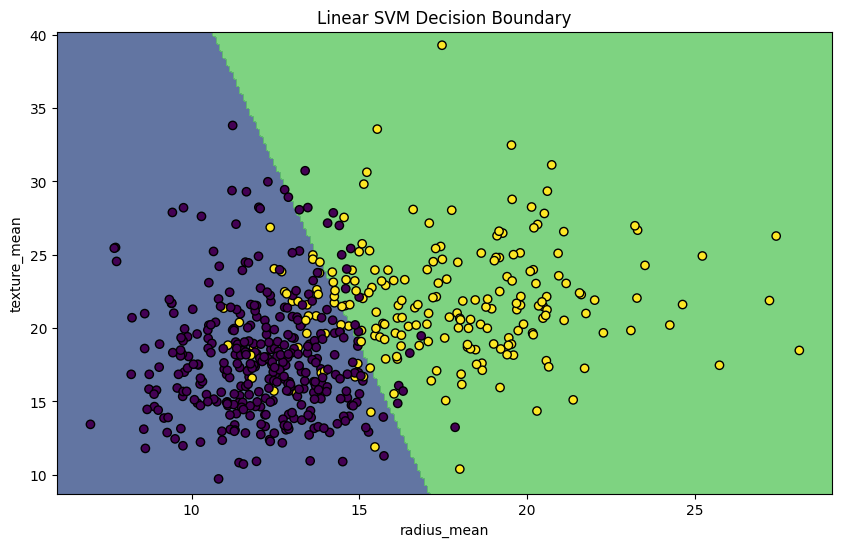

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


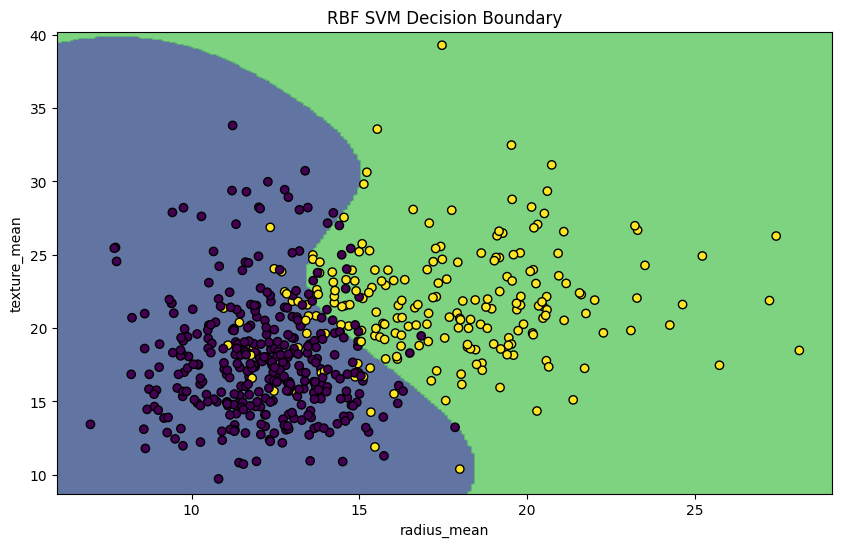

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Linear SVM decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_linear = svm_linear_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)
plt.contourf(xx, yy, Z_linear, alpha=0.8)
plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_2d, edgecolors='k', marker='o')
plt.title('Linear SVM Decision Boundary')
plt.xlabel(X_2d.columns[0])
plt.ylabel(X_2d.columns[1])
plt.show()

# RBF SVM decision boundary
plt.figure(figsize=(10, 6))
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z_rbf = svm_rbf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rbf, alpha=0.8)
plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y_2d, edgecolors='k', marker='o')
plt.title('RBF SVM Decision Boundary')
plt.xlabel(X_2d.columns[0])
plt.ylabel(X_2d.columns[1])
plt.show()

## Summary:

### Data Analysis Key Findings

*   Two features, `radius_mean` and `texture_mean`, were selected for 2D visualization.
*   A linear SVM model and an RBF SVM model were trained using the selected features.
*   The decision boundaries for both the linear and RBF SVM models were successfully visualized, showing how each model separates the two classes based on the selected features.

### Insights or Next Steps

*   Comparing the decision boundaries can visually illustrate the difference in how linear and non-linear SVM kernels classify the data.
*   Further analysis could involve evaluating the performance of these 2D models and comparing them to models trained on the full dataset.


# Task
Tune hyperparameters for SVM models (linear and RBF) using grid search with cross-validation on the dataset located at "/content/archive (5).zip".

## Define parameter grid

### Subtask:
Define a grid of hyperparameters (C and gamma) to search over.


**Reasoning**:
Define the hyperparameter grids for both linear and RBF SVM models.



In [14]:
param_grid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1]}

## Perform grid search

### Subtask:
Perform a grid search with cross-validation to find the best combination of hyperparameters for each SVM model (linear and RBF).


**Reasoning**:
Perform grid search with cross-validation for both linear and RBF SVM models.



In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Linear SVM Grid Search
svm_linear = SVC(kernel='linear', random_state=42)
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)
grid_search_linear.fit(X_train, y_train)

# RBF SVM Grid Search
svm_rbf = SVC(kernel='rbf', random_state=42)
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)
grid_search_rbf.fit(X_train, y_train)

# Print best parameters and scores
print("Best parameters for Linear SVM:", grid_search_linear.best_params_)
print("Best cross-validation score for Linear SVM:", grid_search_linear.best_score_)

print("Best parameters for RBF SVM:", grid_search_rbf.best_params_)
print("Best cross-validation score for RBF SVM:", grid_search_rbf.best_score_)

Best parameters for Linear SVM: {'C': 10}
Best cross-validation score for Linear SVM: 0.962407660738714
Best parameters for RBF SVM: {'C': 1, 'gamma': 0.001}
Best cross-validation score for RBF SVM: 0.9177838577291382


## Evaluate best model

### Subtask:
Evaluate the performance of the SVM models with the best hyperparameters on the testing data.


**Reasoning**:
Evaluate the performance of the best linear and RBF SVM models on the test data using accuracy, precision, recall, and F1-score.



In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the best models
best_svm_linear = grid_search_linear.best_estimator_
best_svm_rbf = grid_search_rbf.best_estimator_

# Predict on the test set
y_pred_linear_tuned = best_svm_linear.predict(X_test)
y_pred_rbf_tuned = best_svm_rbf.predict(X_test)

# Evaluate the tuned linear SVM
accuracy_linear_tuned = accuracy_score(y_test, y_pred_linear_tuned)
precision_linear_tuned = precision_score(y_test, y_pred_linear_tuned)
recall_linear_tuned = recall_score(y_test, y_pred_linear_tuned)
f1_linear_tuned = f1_score(y_test, y_pred_linear_tuned)

print(f"Tuned Linear SVM Performance:")
print(f"Accuracy: {accuracy_linear_tuned:.4f}")
print(f"Precision: {precision_linear_tuned:.4f}")
print(f"Recall: {recall_linear_tuned:.4f}")
print(f"F1-score: {f1_linear_tuned:.4f}\n")

# Evaluate the tuned RBF SVM
accuracy_rbf_tuned = accuracy_score(y_test, y_pred_rbf_tuned)
precision_rbf_tuned = precision_score(y_test, y_pred_rbf_tuned)
recall_rbf_tuned = recall_score(y_test, y_pred_rbf_tuned)
f1_rbf_tuned = f1_score(y_test, y_pred_rbf_tuned)

print(f"Tuned RBF SVM Performance:")
print(f"Accuracy: {accuracy_rbf_tuned:.4f}")
print(f"Precision: {precision_rbf_tuned:.4f}")
print(f"Recall: {recall_rbf_tuned:.4f}")
print(f"F1-score: {f1_rbf_tuned:.4f}")

Tuned Linear SVM Performance:
Accuracy: 0.9650
Precision: 0.9455
Recall: 0.9630
F1-score: 0.9541

Tuned RBF SVM Performance:
Accuracy: 0.9231
Precision: 0.8644
Recall: 0.9444
F1-score: 0.9027


## Summary:

### Data Analysis Key Findings

*   The grid search for the Linear SVM identified a `C` value of 10 as the best hyperparameter, achieving a best cross-validation score of approximately 0.9624.
*   For the RBF SVM, the grid search found the optimal hyperparameters to be `C=1` and `gamma=0.001`, with a best cross-validation score of approximately 0.9178.
*   On the test set, the tuned Linear SVM achieved an accuracy of 0.9650, precision of 0.9455, recall of 0.9630, and an F1-score of 0.9541.
*   The tuned RBF SVM performed slightly worse on the test set, with an accuracy of 0.9231, precision of 0.8644, recall of 0.9444, and an F1-score of 0.9027.

### Insights or Next Steps

*   The tuned Linear SVM demonstrated superior performance compared to the tuned RBF SVM on this dataset.
*   Consider exploring a wider range of hyperparameters or different kernels for the RBF SVM to potentially improve its performance.
